In [15]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import matthews_corrcoef, roc_auc_score
from sklearn.cross_validation import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

DATA_DIR = "./"
TRAIN_DATE = "{0}/train_date.csv".format(DATA_DIR)
TRAIN_NUMERIC = "{0}/train_numeric.csv".format(DATA_DIR)

In [16]:
date_chunks = pd.read_csv(TRAIN_DATE, index_col=0, chunksize=100000, dtype=np.float32)
num_chunks = pd.read_csv(TRAIN_NUMERIC, index_col=0, chunksize=100000, dtype=np.float32)
X = pd.concat([pd.concat([dchunk,nchunk],axis=1).sample(frac=0.05) for dchunk,nchunk in zip(date_chunks,num_chunks)],axis=0)
X.iloc[:10,:]

,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,L0_S0_D19,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
Id,,,,,,,,,,,,,,,,,,,,,
94867.0,353.070007,353.070007,353.070007,353.070007,353.070007,353.070007,353.070007,353.070007,353.070007,353.070007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
17450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
85857.0,236.440002,236.440002,236.440002,236.440002,236.440002,236.440002,236.440002,236.440002,236.440002,236.440002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
87520.0,1631.319946,1631.319946,1631.319946,1631.319946,1631.319946,1631.319946,1631.319946,1631.319946,1631.319946,1631.319946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
158365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
138734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
164656.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
106235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
127093.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [14]:
y = pd.read_csv(TRAIN_NUMERIC, index_col=0, usecols=[0,969], dtype=np.float32)
y.iloc[:10,:]

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Response
Id,
4.0,0.0
6.0,0.0
7.0,0.0
9.0,0.0
11.0,0.0
13.0,0.0
14.0,0.0
16.0,0.0
18.0,0.0


In [4]:
y_val = y.loc[X.index].values.ravel()
X = X.values

In [5]:
clf = XGBClassifier(base_score=0.05)
clf.fit(X,y_val)

XGBClassifier(base_score=0.05, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

[ 939 1019 1887 1907 2124]


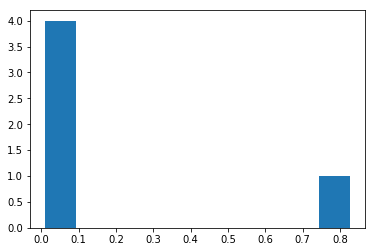

In [7]:
plt.hist(clf.feature_importances_[clf.feature_importances_>0])
important_indices = np.where(clf.feature_importances_>0.005)[0]
print(important_indices)

In [8]:
date_cols = pd.read_csv(TRAIN_DATE,index_col=0,nrows=1)
n_date_features = len(date_cols.columns)
X = np.concatenate([pd.read_csv(TRAIN_DATE,index_col=0,dtype=np.float32,usecols=np.concatenate([[0],important_indices[important_indices<n_date_features]+1])).values,
               pd.read_csv(TRAIN_NUMERIC,index_col=0,dtype=np.float32,usecols=np.concatenate([[0],important_indices[important_indices>=n_date_features]+1-n_date_features])).values],axis=1)

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [9]:
y = pd.read_csv(TRAIN_NUMERIC,index_col=0,dtype=np.float32,usecols=[0,969]).values.ravel()

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [18]:
date_cols = pd.read_csv(TRAIN_DATE,index_col=0,nrows=1)
n_date_features = len(date_cols.columns)
X = np.concatenate([pd.read_csv(TRAIN_DATE,index_col=0,dtype=np.float32,usecols=np.concatenate([[0],important_indices[important_indices<n_date_features]+1])).values,
               pd.read_csv(TRAIN_NUMERIC,index_col=0,dtype=np.float32,usecols=np.concatenate([[0],important_indices[important_indices>=n_date_features]+1-n_date_features])).values],axis=1)

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1.0


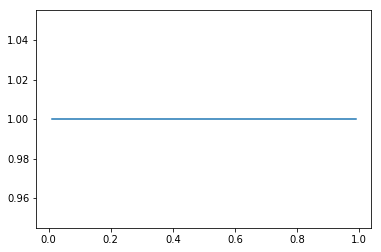

In [20]:
thresholds = np.linspace(0.01,0.99,50)
mcc = np.array([matthews_corrcoef(y,preds>thr) for thr in thresholds])
plt.plot(thresholds,mcc)
best_threshold = thresholds[mcc.argmax()]
print(mcc.max())